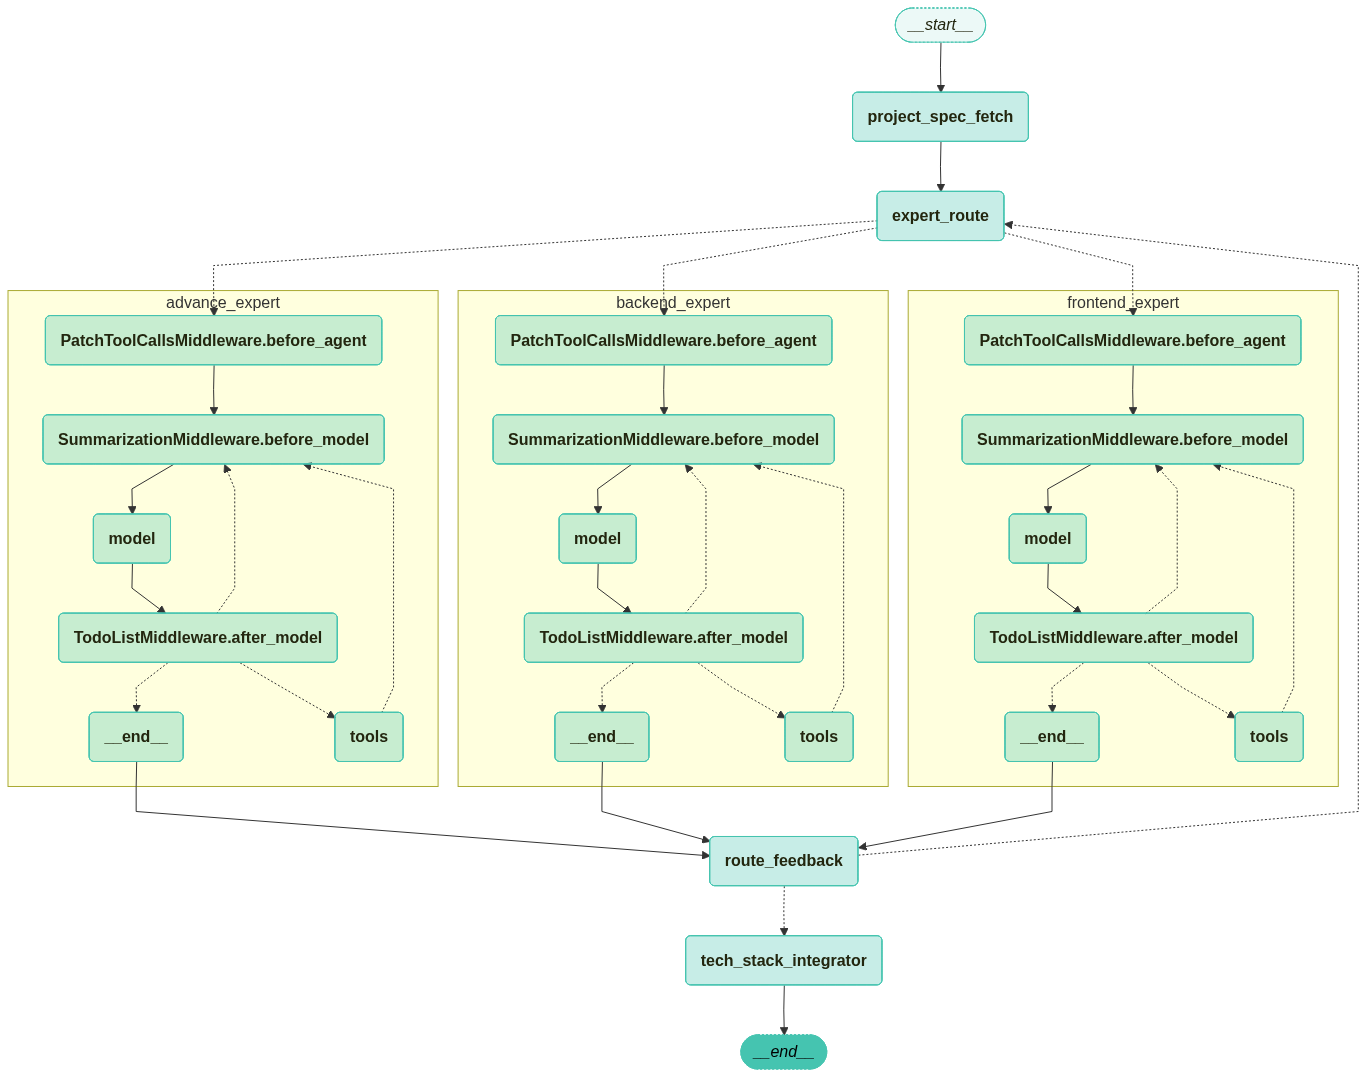

In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from app.agents.enums import TaskType
from app.agents.sub_agents.recommend.graph import recommend_graph
from app.agents.graph import builder
from langchain_teddynote.graphs import visualize_graph

visualize_graph(recommend_graph, xray=True)

In [5]:
from app.core.log import langfuse_handler

ouput = recommend_graph.invoke({
    "workspace_id":1,
    "task_type": TaskType.BACKEND, 
    "node_name": "N : M 채팅 기능 구현", 
    "node_description": """
    1. 사용자가 입력한 채팅 메시지를 처리하고 응답을 생성
    2. 사용자의 채팅 메시지가 포함된 대화를 데이터베이스에 저장
    """
}, config={"callbacks": [langfuse_handler]})

BadRequestError: Error code: 400 - {'message': '[GMS 에러] Model not found in request for domain api.openai.com', 'statusCode': 400}

In [ ]:
# indent=4를 주어 예쁘게 출력
json_string = ouput['tech_list'].model_dump_json(indent=2)
print(json_string)

{
  "techs": [
    {
      "id": "50004",
      "name": "apache-kafka",
      "advantage": "높은 쓰기/읽기 처리량과 파티셔닝 기반 수평확장이 쉬워 대규모 N:M 채팅(수백~수만 TPS)을 처리하기 유리하며, 메시지 재생(replay)과 이벤트 소싱에 적합해 채팅 히스토리 보존·재처리 시 강점이 있음.",
      "disadvantage": "운영(클러스터 운영, 브로커/주키퍼/운영 툴링) 복잡도가 높고, 짧은 지연(ultra-low latency) 실시간 대화에는 튜닝이 필요. 단건 트랜잭션성(즉시 일관성 보장) 및 메시지 순서 보장은 파티션 설계에 의존함.",
      "description": "Kafka는 분산 로그 기반의 스트리밍 플랫폼으로, 토픽 파티셔닝을 통해 높은 처리량과 내구성을 제공한다. 채팅 아키텍처에서 메시지 파이프(ingest), 히스토리 저장(consumer→DB에 쓰기), 실시간 브로드캐스트(consumer→WebSocket 서버)에 사용될 수 있다. 파티션을 적절히 나누면 소비자 그룹으로 수평 확장이 가능하고, 메시지 오프셋을 통해 재처리(replay)·백필(backfill)이 가능하다. 대형 서비스(수십만 메시지/초) 설계에 자주 사용된다.",
      "ref": "https://medium.com/@steffankharmaaiarvi/rabbitmq-vs-apache-kafka-architectural-and-conceptual-differences-37f986a8d5f5",
      "recommendation_score": 5
    },
    {
      "id": "50005",
      "name": "rabbitmq-stomp",
      "advantage": "AMQP(또는 STOMP over WebSocket) 조합은 브라우커가 라우팅·Ack·트랜잭션·우선순위 등을 지원해 중간 규모 채팅(수천 TPS)에서 낮은 레이턴시와 구